In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import matplotlib.pyplot as plt
%matplotlib inline

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/dataset")

In [ ]:
rankings = pd.read_csv('fifa_ranking.csv')
rankings = rankings.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'rank_date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]
rankings.country_full.replace("^IR Iran*", "Iran", regex=True, inplace=True)
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])
rankings.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0,0.0
2,3,Switzerland,SUI,0.0,1993-08-08,0.0,0.0,0.0
3,4,Sweden,SWE,0.0,1993-08-08,0.0,0.0,0.0
4,5,Argentina,ARG,0.0,1993-08-08,0.0,0.0,0.0


In [ ]:
matches = pd.read_csv("results.csv")
matches =  matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})
matches['date'] = pd.to_datetime(matches['date'])
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
world_cup = pd.read_csv("World Cup 2022 Dataset.csv")
world_cup = world_cup.loc[:, ['Team', 'Group', 'First match \nagainst', 'Second match\n against', 'Third match\n against']]
world_cup = world_cup.dropna(how='all')
world_cup = world_cup.replace({"IR Iran": "Iran", 
                               "Costarica": "Costa Rica", 
                               "Porugal": "Portugal", 
                               "Columbia": "Colombia", 
                               "Korea" : "Korea Republic"})
world_cup = world_cup.set_index('Team')
world_cup.head()

,Group,First match \nagainst,Second match\n against,Third match\n against
Team,,,,
Qatar,A,Ecuador,Senegal,Netherlands
Ecuador,A,Qatar,Netherlands,Senegal
Senegal,A,Netherlands,Qatar,Ecuador
Netherlands,A,Senegal,Ecuador,Qatar
England,B,Iran,USA,Wales


In [ ]:
# Get Complete Date wise Ranking table
rankings = rankings.set_index(['rank_date'])\
                    .groupby(['country_full'],group_keys = False)\
                    .resample('D').first()\
                    .fillna(method='ffill')\
                    .reset_index()
rankings.head()

,rank_date,rank,country_full,country_abrv,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,2003-01-15,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
1,2003-01-16,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
2,2003-01-17,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
3,2003-01-18,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
4,2003-01-19,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0


In [ ]:
matches = matches.merge(rankings,
                         left_on=['date', 'home_team'],
                         right_on=['rank_date', 'country_full'])
# matches.head()

matches = matches.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,three_year_ago_weighted_home,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,...,0.0,0.0,1993-08-08,22.0,Uruguay,URU,0.0,0.0,0.0,0.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,...,0.0,0.0,1993-08-08,14.0,Mexico,MEX,0.0,0.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,...,0.0,0.0,1993-08-08,94.0,Venezuela,VEN,0.0,0.0,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,...,0.0,0.0,1993-08-08,86.0,Sierra Leone,SLE,0.0,0.0,0.0,0.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,...,0.0,0.0,1993-08-08,5.0,Argentina,ARG,0.0,0.0,0.0,0.0


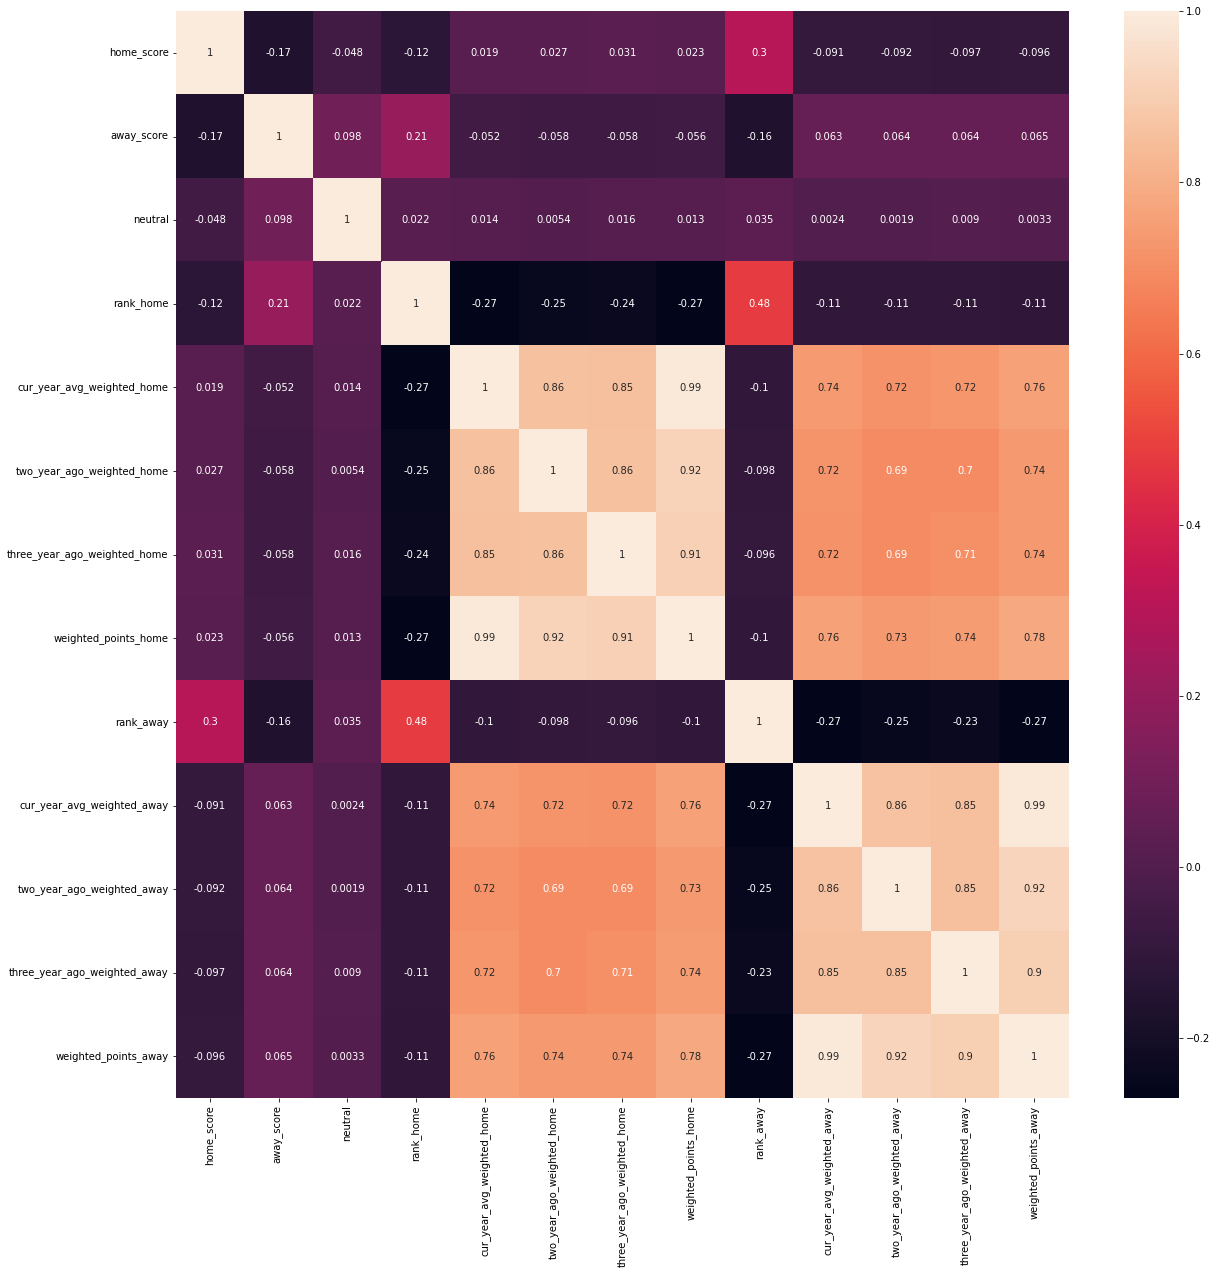

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
corr1 = matches.corr()
corr1
sns.heatmap(corr1,annot=True)

In [ ]:
matches['rank_difference'] = matches['rank_home'] - matches['rank_away']
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2
matches['point_difference'] = matches['weighted_points_home'] - matches['weighted_points_away']
matches['score_difference'] = matches['home_score'] - matches['away_score']
matches['is_won'] = matches['score_difference'] > 0 # take draw as lost
matches['is_stake'] = matches['tournament'] != 'Friendly'

In [ ]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from re import A

# API Keys and Tokens
consumer_key = 'J1xuLh6SdlKjweyDaahCMr0gH'
consumer_secret = 'QwOuky3PdRHHCkPVTgc6C2a1TRpZRz6BMNBokpwzHXVOK4atzd'
access_token = '1521253408623427584-pbidxEXB4jwRdOtWg6Lgjl1vpM7HA8'
access_token_secret = 'UxvzISp5BxIC9qOMHFol0o20ZIAICGYe52Rycea7TCe8P'

import tweepy
import pandas as pd

# authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

# user tweets
# user = 'veritasium'
# limit=300

# tweets = tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode='extended').items(limit)

# search tweets


country=world_cup.index
twitterdf=[0]*len(country)

for i in range(len(country)):
   a='#'+country[i]+'FC'
   limit=300
   keywords = '#FifaWorldCup2022' and a
   tweets = tweepy.Cursor(api.search, q=keywords, tweet_mode='extended').items(limit)
   data=[]
   for tweet in tweets:
       data.append([tweet.user.screen_name, tweet.full_text])
  
   twitterdf[i]=len(data)

print(country)
print(twitterdf)


  



Index(['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA',
       'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France',
       'Peru', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan',
       'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia',
       'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay',
       'Korea Republic'],
      dtype='object', name='Team')
[0, 0, 0, 0, 5, 0, 0, 2, 14, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset


tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
matches = matches.reindex(
       np.random.permutation(matches.index))

In [ ]:
def preprocess_features(matches):
    
    selected_features = matches[["average_rank", "rank_difference", "point_difference", "is_stake"]]
    processed_features = selected_features.copy()
    return processed_features

def preprocess_targets(matches):
    output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
    output_targets["is_won"] = matches['is_won']
    return output_targets

In [ ]:
# Choose the first 60% i.e 10900 (out of 18167) examples for training.
training_examples = preprocess_features(matches.head(10900))
training_targets = preprocess_targets(matches.head(10900))

# Choose the last 40% i.e 7267 (out of 18167) examples for validation.
validation_examples = preprocess_features(matches.tail(7267))
validation_targets = preprocess_targets(matches.tail(7267))

Complete_Data_training = preprocess_features(matches)
Complete_Data_Validation = preprocess_targets(matches)

In [ ]:
def construct_feature_columns(input_features):
    return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [ ]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a neural network model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
     # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = tf.compat.v1.data.make_one_shot_iterator(ds).get_next()
    return features, labels

In [ ]:
from tensorflow.keras import optimizers
from functools import partial
from tensorflow.python.ops.clip_ops import clip_by_norm
def train_nn_classification_model(
    my_optimizer,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    periods = 10
    steps_per_period = steps / periods
  # Create a DNNRegressor object.
     

    my_optimizer = partial(optimizers.SGD,0.01,0.05)
    dnn_classifier = tf.estimator.DNNClassifier(
      feature_columns=construct_feature_columns(training_examples),
      hidden_units=hidden_units,
      optimizer=my_optimizer
  )
  
  # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["is_won"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["is_won"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["is_won"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
    # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.

    print("Training model...")
    print("LogLoss (on training data):")
    training_log_losses = []
    validation_log_losses = []
    for period in range (0, periods):
    # Train the model, starting from the prior state.
        dnn_classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
        # Take a break and compute predictions.    
        training_probabilities = dnn_classifier.predict(input_fn=predict_training_input_fn)
        training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
        validation_probabilities = dnn_classifier.predict(input_fn=predict_validation_input_fn)
        validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
        training_log_loss = metrics.log_loss(training_targets, training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
        training_log_losses.append(training_log_loss)
        validation_log_losses.append(validation_log_loss)
        print("Model training finished.")
 
    # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_losses, label="training")
    plt.plot(validation_log_losses, label="validation")
    plt.legend()

    return dnn_classifier

Training model...
LogLoss (on training data):
  period 00 : 0.61
Model training finished.
  period 01 : 0.60
Model training finished.
  period 02 : 0.60
Model training finished.
  period 03 : 0.62
Model training finished.
  period 04 : 0.60
Model training finished.
  period 05 : 0.60
Model training finished.
  period 06 : 0.62
Model training finished.
  period 07 : 0.60
Model training finished.
  period 08 : 0.60
Model training finished.
  period 09 : 0.60
Model training finished.


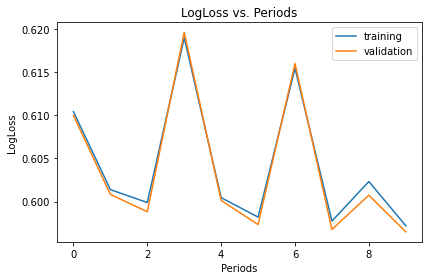

In [ ]:
linear_classifier = train_nn_classification_model(
    my_optimizer=tf.compat.v1.train.AdagradOptimizer(learning_rate=0.07),
    steps=3000,
    batch_size=2000,
    hidden_units=[5, 5,6,5],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [ ]:
def train_complete_model(my_optimizer,
    steps,
    batch_size,
    hidden_units,
    Complete_Data_training,
    Complete_Data_Validation) :
    
    periods = 10
    steps_per_period = steps / periods
  # Create a DNNRegressor object.
    my_optimizer = partial(optimizers.SGD,0.01,0.05)
    dnn_classifier = tf.estimator.DNNClassifier(
      feature_columns=construct_feature_columns(Complete_Data_training),
      hidden_units=hidden_units,
      optimizer=my_optimizer
  )
    # Create input functions.
    Complete_training_input_fn = lambda: my_input_fn(Complete_Data_training, 
                                          Complete_Data_Validation["is_won"], 
                                          batch_size=batch_size)
    predict_Complete_training_input_fn = lambda: my_input_fn(Complete_Data_training, 
                                                  Complete_Data_Validation["is_won"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    
    print("Training model...")
    print("LogLoss (on training data):")
    training_log_losses = []
    # validation_log_losses = []
    for period in range (0, periods):
    # Train the model, starting from the prior state.
        dnn_classifier.train(
        input_fn=Complete_training_input_fn,
        steps=steps_per_period
    )
        # Take a break and compute predictions.    
        Complete_training_probabilities = dnn_classifier.predict(input_fn=predict_Complete_training_input_fn)
        Complete_training_probabilities = np.array([item['probabilities'] for item in Complete_training_probabilities])
    
        
        training_log_loss = metrics.log_loss(Complete_Data_Validation, Complete_training_probabilities)
        #validation_log_loss = metrics.log_loss(Complete_Data_Validation, validation_probabilities)
    # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
        training_log_losses.append(training_log_loss)
        #validation_log_losses.append(validation_log_loss)
    print("Model training finished.")
      # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_losses, label="training")
    #plt.plot(validation_log_losses, label="validation")
    plt.legend()

    return dnn_classifier


Training model...
LogLoss (on training data):
  period 00 : 0.68
  period 01 : 0.64
  period 02 : 0.63
  period 03 : 0.63
  period 04 : 0.62
  period 05 : 0.62
  period 06 : 0.62
  period 07 : 0.62
  period 08 : 0.62
  period 09 : 0.62
Model training finished.


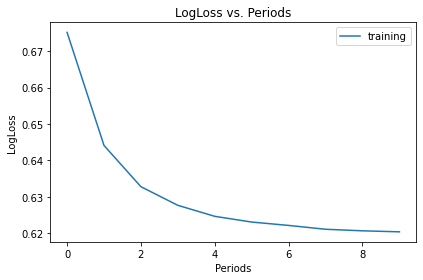

In [ ]:
linear_classifier = train_complete_model(
    my_optimizer=tf.compat.v1.train.AdagradOptimizer(learning_rate=0.07),
    steps=3000,
    batch_size=2000,
    hidden_units=[5, 5,6,5],
    Complete_Data_training=Complete_Data_training,
    Complete_Data_Validation=Complete_Data_Validation)

In [ ]:
margin = 0.05

# let's define the rankings at the time of the World Cup
world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'].max()) & 
                                    rankings['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])
j=0
for i in country:
  point=world_cup_rankings._get_value(i,'weighted_points')
  point=point+twitterdf[j]
  world_cup_rankings.at[i,'weighted_points']=point
  j=j+1



In [ ]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    
    for home, away in combinations(world_cup.query('Group =="{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=validation_examples.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        row['is_won'] =np.nan
        predict_validation_input_fn1 = lambda: my_input_fn(row, 
                                                  row["is_won"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
        validation_probabilities1 = linear_classifier.predict(input_fn=predict_validation_input_fn1)
        # Get just the probabilities for the positive class.
        validation_probabilities1 = np.array([item['probabilities'][1] for item in validation_probabilities1])
        #print(validation_probabilities1[0])
        home_win_prob = validation_probabilities1[0]
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob

        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Starting group A:___
Qatar vs. Ecuador: Qatar wins with 0.57
Qatar vs. Senegal: Senegal wins with 0.77
Qatar vs. Netherlands: Netherlands wins with 0.90
Ecuador vs. Senegal: Senegal wins with 0.69
Ecuador vs. Netherlands: Netherlands wins with 0.86
Senegal vs. Netherlands: Netherlands wins with 0.67
___Starting group D:___
France vs. Peru: France wins with 0.60
France vs. Denmark: Draw
France vs. Tunisia: France wins with 0.62
Peru vs. Denmark: Denmark wins with 0.55
Peru vs. Tunisia: Peru wins with 0.61
Denmark vs. Tunisia: Denmark wins with 0.59
___Starting group E:___
Spain vs. Costa Rica: Spain wins with 0.61
Spain vs. Germany: Germany wins with 0.70
Spain vs. Japan: Spain wins with 0.62
Costa Rica vs. Germany: Germany wins with 0.84
Costa Rica vs. Japan: Costa Rica wins with 0.62
Germany vs. Japan: Germany wins with 0.62
___Starting group F:___
Belgium vs. Canada: Belgium wins with 0.62
Belgium vs. Morocco: Belgium wins with 0.62
Belgium vs. Croatia: Belgium wins with 0.59
Cana

In [ ]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=validation_examples.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        row['is_won'] =np.nan
        predict_validation_input_fn1 = lambda: my_input_fn(row, 
                                                  row["is_won"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
        validation_probabilities1 = linear_classifier.predict(input_fn=predict_validation_input_fn1)
        # Get just the probabilities for the positive class.
        validation_probabilities1 = np.array([item['probabilities'][1] for item in validation_probabilities1])
        #print(validation_probabilities1[0])
        home_win_prob = validation_probabilities1[0]

        #home_win_prob = model.predict_proba(row)[:,1][0]
        if home_win_prob <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Netherlands vs. USA: Netherlands wins with probability 0.58
Argentina vs. Denmark: Argentina wins with probability 0.57
Germany vs. Croatia: Germany wins with probability 0.57
Brazil vs. Uruguay: Brazil wins with probability 0.62
Senegal vs. England: England wins with probability 0.60
Mexico vs. France: Mexico wins with probability 0.57
Spain vs. Belgium: Belgium wins with probability 0.53
Switzerland vs. Portugal: Portugal wins with probability 0.51


___Starting of the quarterfinal___
Netherlands vs. Argentina: Netherlands wins with probability 0.60
Germany vs. Brazil: Germany wins with probability 0.56
England vs. Mexico: England wins with probability 0.60
Belgium vs. Portugal: Belgium wins with probability 0.59


___Starting of the semifinal___
Netherlands vs. Germany: Germany wins with probability 0.69
England vs. Belgium: Belgium wins with probability 0.60


___Starting of the final___
Germany vs. Belgium: Germany wins with probability 0.58




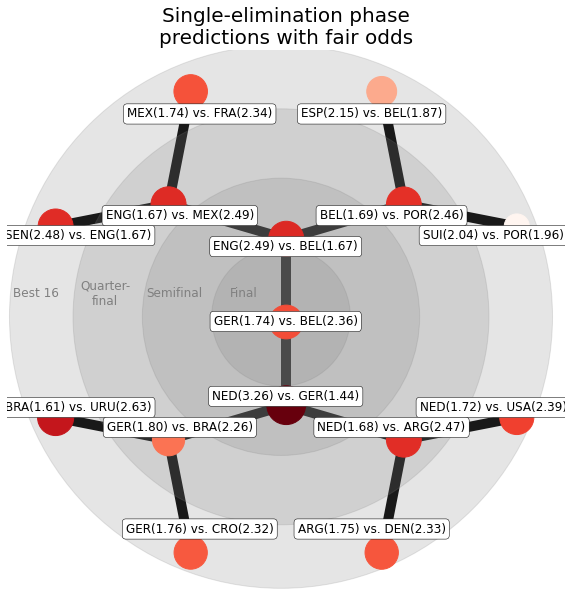

In [ ]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

node_sizes = pd.DataFrame(list(reversed(odds)))
scale_factor = 0.3 # for visualization
G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi')
centre = pd.DataFrame(pos).mean(axis=1).mean()

plt.figure(figsize=(10, 10))
ax = plt.subplot(1,1,1)
# add circles 
circle_positions = [(235, 'black'), (180, 'blue'), (120, 'red'), (60, 'yellow')]
[ax.add_artist(plt.Circle((centre, centre), 
                          cp, color='grey', 
                          alpha=0.2)) for cp, c in circle_positions]

# draw first the graph
nx.draw(G, pos, 
        node_color=node_sizes.diff(axis=1)[1].abs().pow(scale_factor), 
        node_size=node_sizes.diff(axis=1)[1].abs().pow(scale_factor)*2000, 
        alpha=1, 
        cmap='Reds',
        edge_color='black',
        width=10,
        with_labels=False)

# draw the custom node labels
shifted_pos = {k:[(v[0]-centre)*0.9+centre,(v[1]-centre)*0.9+centre] for k,v in pos.items()}
nx.draw_networkx_labels(G, 
                        pos=shifted_pos, 
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
                        labels=dict(zip(reversed(range(len(labels))), labels)))

texts = ((10, 'Best 16', 'black'), (70, 'Quarter-\nfinal', 'blue'), (130, 'Semifinal', 'red'), (190, 'Final', 'yellow'))
[plt.text(p, centre+20, t, 
          fontsize=12, color='grey', 
          va='center', ha='center') for p,t,c in texts]
plt.axis('equal')
plt.title('Single-elimination phase\npredictions with fair odds', fontsize=20)
plt.show()